In [1724]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import numpy as np
import os

color_palette = sns.color_palette()

## Dicionário de Dados

In [1725]:
isp_dict = pd.read_csv("Dicionario_dados_isp.csv", sep=";")
isp_dict

,Variável,Descrição da variável,Contagem,Observação,Grupo
0,fmun_cod,Código IBGE de 7 dígitos do município,NaN,NaN,NaN
1,fmun,Nome do município,NaN,NaN,NaN
2,ano,Ano da comunicação da ocorrência,NaN,NaN,NaN
3,mes,Mês da comunicação da ocorrência,NaN,NaN,NaN
4,mes_ano,Mês e ano da comunicação da ocorrência,NaN,NaN,NaN
5,regiao,1-Baixada 2-Capital 3-Grande Niterói 4-Inte...,NaN,NaN,NaN
6,fase,2 - Consolidado sem errata 3 - Consolidado ...,NaN,NaN,NaN
7,hom_doloso,Homicídio doloso,vítima,NaN,CRIMES VIOLENTOS
8,lesao_corp_morte,Lesão corporal seguida de morte,vítima,NaN,CRIMES VIOLENTOS
9,latrocinio,Latrocínio (roubo seguido de morte),vítima,NaN,CRIMES VIOLENTOS


In [1726]:
df = pd.read_csv("BaseDPEvolucaoMensalCisp.csv", sep=";", encoding="ISO-8859-1")
df.head(5)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3


In [1727]:
df.columns

Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [1728]:
df["cmp"].isna().sum()

4646

In [1729]:
df["cmba"].isna().sum()

4646

In [1730]:
df["mes_ano"] = df["mes_ano"].str.replace("m", "-")
df.set_index("mes_ano", inplace=True)
df.index = pd.to_datetime(df.index)
df.head(5)

,cisp,mes,ano,aisp,risp,munic,mcirc,regiao,hom_doloso,lesao_corp_morte,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1,1,2003,5,1,Rio de Janeiro,3304557,Capital,0,0,...,NaN,NaN,21,2,0,0,0,0,578,3
2003-01-01,4,1,2003,5,1,Rio de Janeiro,3304557,Capital,3,0,...,NaN,NaN,15,6,0,1,0,0,441,3
2003-01-01,5,1,2003,5,1,Rio de Janeiro,3304557,Capital,3,0,...,NaN,NaN,47,2,1,0,0,0,637,3
2003-01-01,6,1,2003,1,1,Rio de Janeiro,3304557,Capital,6,0,...,NaN,NaN,26,2,1,0,0,0,473,3
2003-01-01,7,1,2003,1,1,Rio de Janeiro,3304557,Capital,4,0,...,NaN,NaN,10,1,3,0,0,0,147,3


In [1731]:
df = df.drop(columns=["mes", "ano"], axis=1)
df.head(5)

,cisp,aisp,risp,munic,mcirc,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,...,NaN,NaN,21,2,0,0,0,0,578,3
2003-01-01,4,5,1,Rio de Janeiro,3304557,Capital,3,0,0,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2003-01-01,5,5,1,Rio de Janeiro,3304557,Capital,3,0,0,3,...,NaN,NaN,47,2,1,0,0,0,637,3
2003-01-01,6,1,1,Rio de Janeiro,3304557,Capital,6,0,0,6,...,NaN,NaN,26,2,1,0,0,0,473,3
2003-01-01,7,1,1,Rio de Janeiro,3304557,Capital,4,0,0,4,...,NaN,NaN,10,1,3,0,0,0,147,3


## Analise Rio de Janeiro Todo (ignorando Regiões de CISP, AISP e RISP)

In [1732]:
df.columns

Index(['cisp', 'aisp', 'risp', 'munic', 'mcirc', 'regiao', 'hom_doloso',
       'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial',
       'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_transeunte',
       'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo',
       'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'en

In [1733]:
df_analysis_all_rio = df.drop(columns=['cisp', 'aisp', 'risp', 'munic', 'mcirc', 'regiao','fase', 'total_roubos', 'total_furtos'])
df_analysis_all_rio.head(5)

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0,0,0,0,0,0,1,40,0,1,...,NaN,NaN,NaN,21,2,0,0,0,0,578
2003-01-01,3,0,0,3,0,3,0,47,1,4,...,NaN,NaN,NaN,15,6,0,1,0,0,441
2003-01-01,3,0,0,3,0,3,1,73,2,1,...,NaN,NaN,NaN,47,2,1,0,0,0,637
2003-01-01,6,0,0,6,0,6,2,43,2,1,...,NaN,NaN,NaN,26,2,1,0,0,0,473
2003-01-01,4,0,0,4,0,4,2,18,2,0,...,NaN,NaN,NaN,10,1,3,0,0,0,147


In [1734]:
df_agg = df_analysis_all_rio.groupby(["mes_ano"]).sum()
df_agg.head(5)

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,589,6,20,615,90,705,365,6896,245,163,...,0.0,0.0,0.0,6127,409,144,3,3,2,44793
2003-02-01,583,4,12,599,111,710,361,7099,221,188,...,0.0,0.0,0.0,6047,425,186,5,2,0,45403
2003-03-01,613,5,16,634,113,747,332,6968,236,188,...,0.0,0.0,0.0,5793,462,156,7,7,1,45417
2003-04-01,585,11,14,610,125,735,297,6441,215,207,...,0.0,0.0,0.0,5626,346,120,4,4,1,44184
2003-05-01,599,6,20,625,96,721,381,5843,189,228,...,0.0,0.0,0.0,5436,417,147,4,4,1,45572


In [1735]:
def create_features(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe["mes"] = dataframe.index.month
    dataframe["ano"] = dataframe.index.year
    return dataframe

In [1736]:
df_agg = create_features(df_agg)
df_agg.head(5)

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,mes,ano
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,589,6,20,615,90,705,365,6896,245,163,...,0.0,6127,409,144,3,3,2,44793,1,2003
2003-02-01,583,4,12,599,111,710,361,7099,221,188,...,0.0,6047,425,186,5,2,0,45403,2,2003
2003-03-01,613,5,16,634,113,747,332,6968,236,188,...,0.0,5793,462,156,7,7,1,45417,3,2003
2003-04-01,585,11,14,610,125,735,297,6441,215,207,...,0.0,5626,346,120,4,4,1,44184,4,2003
2003-05-01,599,6,20,625,96,721,381,5843,189,228,...,0.0,5436,417,147,4,4,1,45572,5,2003


In [1737]:
def plot_time_series_event(dataframe: pd.DataFrame, columns: list, title: str) -> None:
    df = dataframe.filter(columns)
    df.plot(style=".", figsize=(15, 5), color=color_palette[0], title=title)
    plt.show()

def plot_line_plot(dataframe: pd.DataFrame, column: str, title: str, color=color_palette[1]) -> None:
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=dataframe.index, y=column,
                 color=color,
             data=dataframe, ax=ax)
    ax.set_title(title)
    plt.show()

def plot_compare_line_plot(dataframe: pd.DataFrame, columns: list, title: str) -> None:
    fig, ax = plt.subplots(figsize=(15, 5))
    colors = sns.color_palette('pastel', n_colors=len(columns))

    for column, color in zip(columns, colors):
        sns.lineplot(x=dataframe.index, y=column,
                     label=column,
                     color=color,
                     data=dataframe, ax=ax)

    ax.set_title(title)
    ax.legend() 
    plt.show()

def get_variable_description(var: str) -> str:
    title = isp_dict.loc[isp_dict["Variável"] == var]
    return title["Descrição da variável"].values[0]

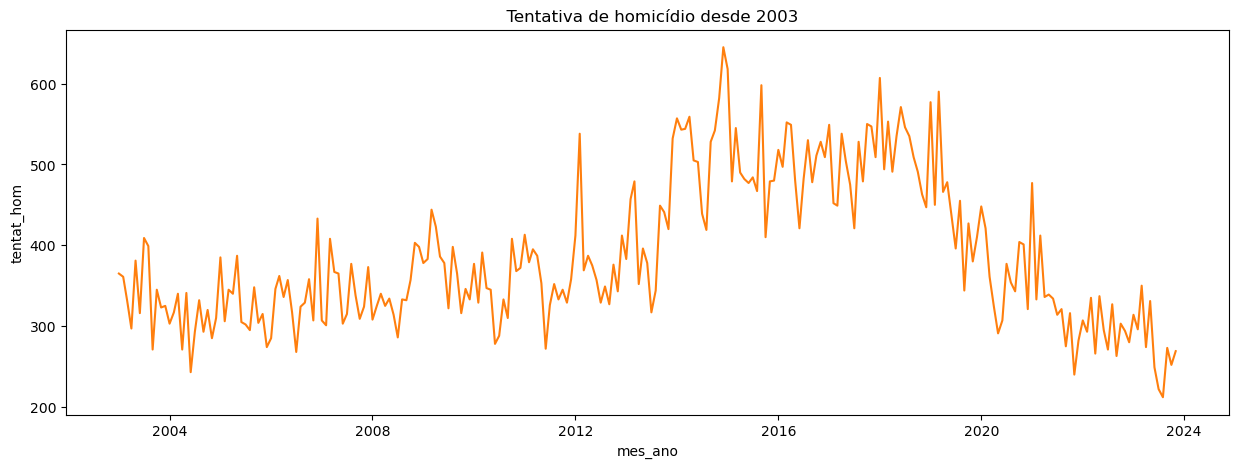

In [1738]:
title = get_variable_description("tentat_hom")
plot_line_plot(df_agg, column="tentat_hom", title=f"{title} desde 2003")

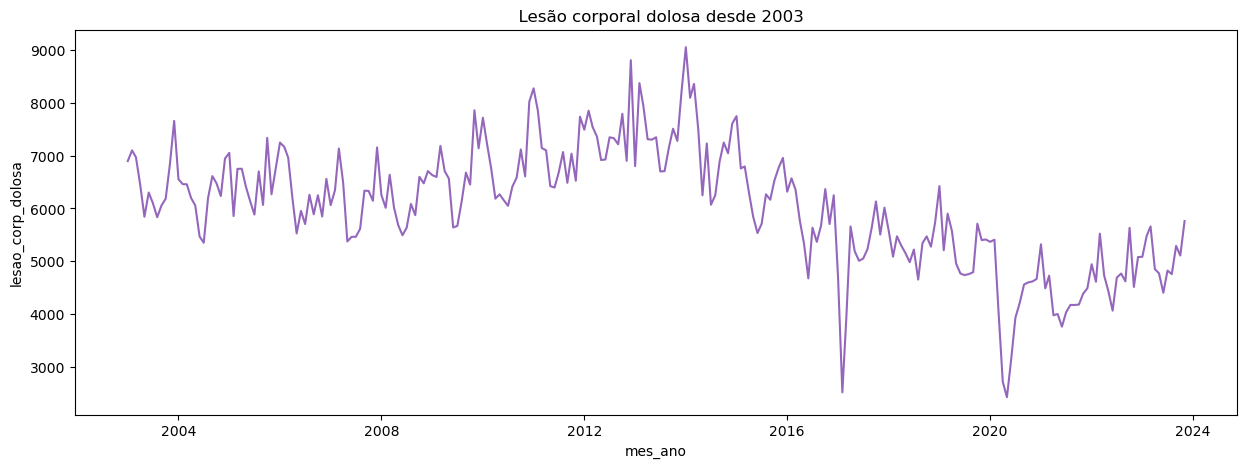

In [1739]:
title = get_variable_description("lesao_corp_dolosa")
plot_line_plot(df_agg, column="lesao_corp_dolosa", title=f"{title} desde 2003", color=color_palette[4])

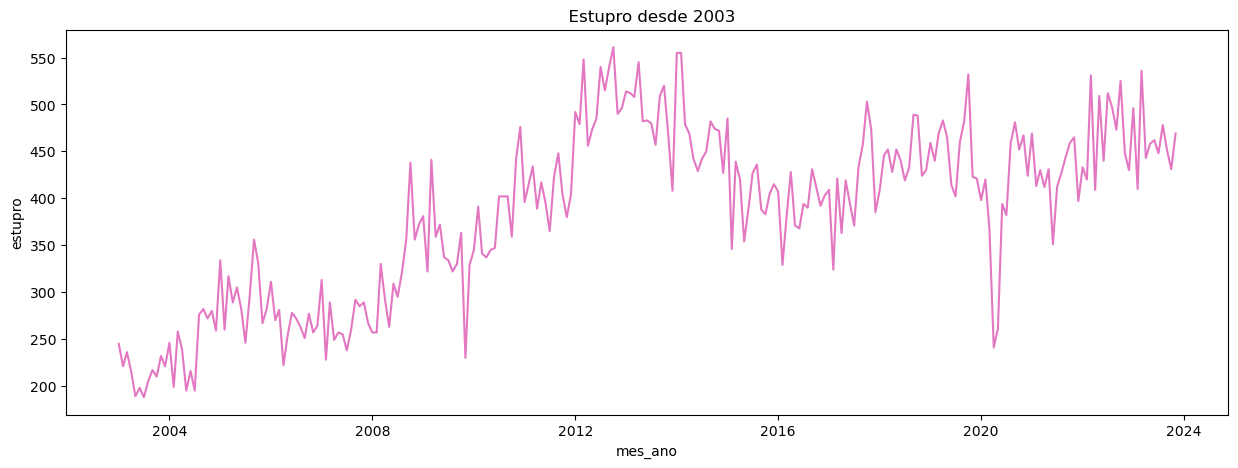

In [1740]:
title = get_variable_description("estupro")
plot_line_plot(df_agg, column="estupro", title=f"{title} desde 2003", color=color_palette[6])

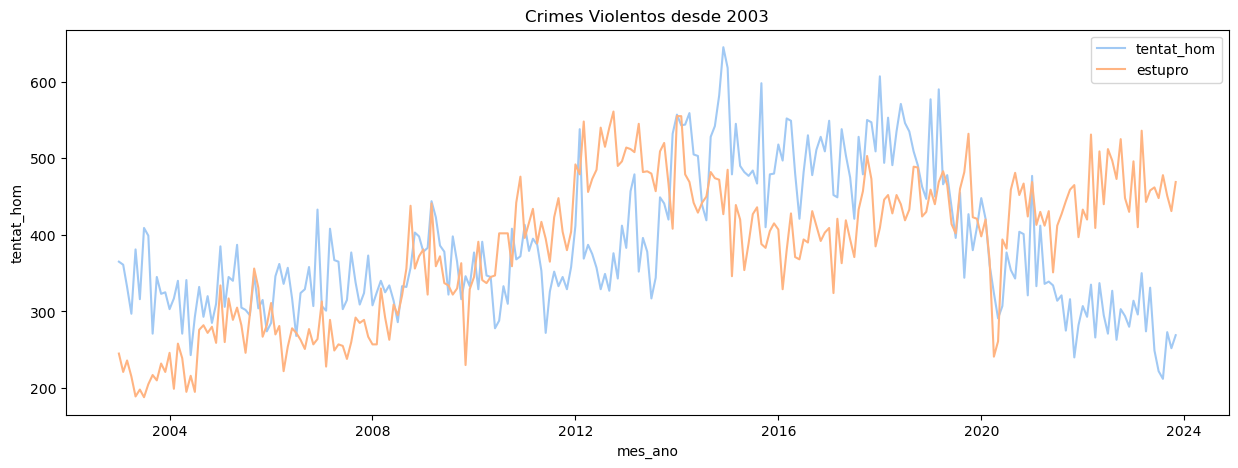

In [1741]:
plot_compare_line_plot(df_agg, columns=[ "tentat_hom", "estupro"], title="Crimes Violentos desde 2003")

In [1742]:
df_filtered = df_agg.filter([ "lesao_corp_dolosa","tentat_hom", "estupro"])
df_filtered.head(5)

,lesao_corp_dolosa,tentat_hom,estupro
mes_ano,,,
2003-01-01,6896,365,245
2003-02-01,7099,361,221
2003-03-01,6968,332,236
2003-04-01,6441,297,215
2003-05-01,5843,381,189


In [1743]:
df_filtered.corr()

,lesao_corp_dolosa,tentat_hom,estupro
lesao_corp_dolosa,1.000000,0.192564,0.012266
tentat_hom,0.192564,1.000000,0.353149
estupro,0.012266,0.353149,1.000000


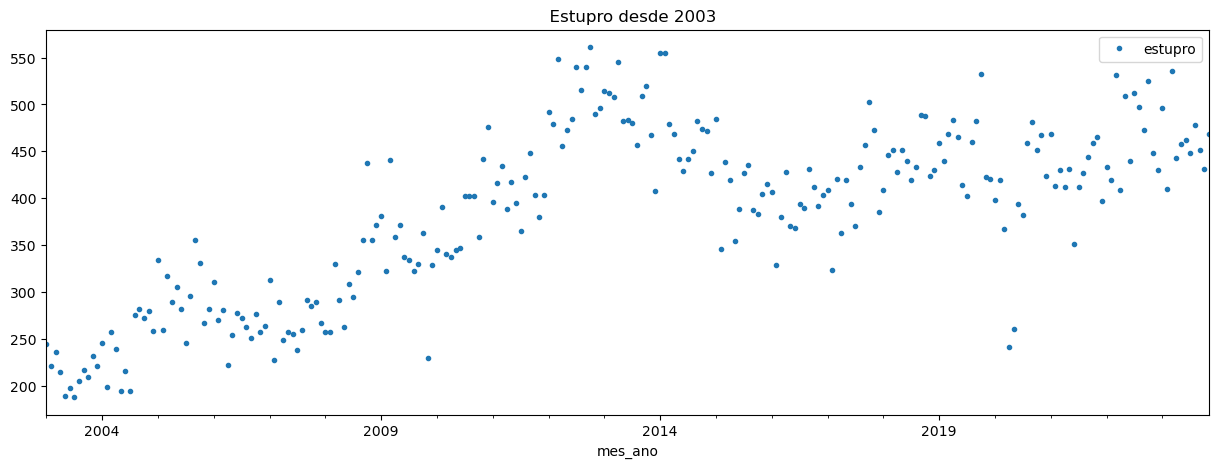

In [1744]:
title = get_variable_description("estupro")
plot_time_series_event(df_agg, columns=["estupro"], title=f"{title} desde 2003")

<Axes: ylabel='Frequency'>

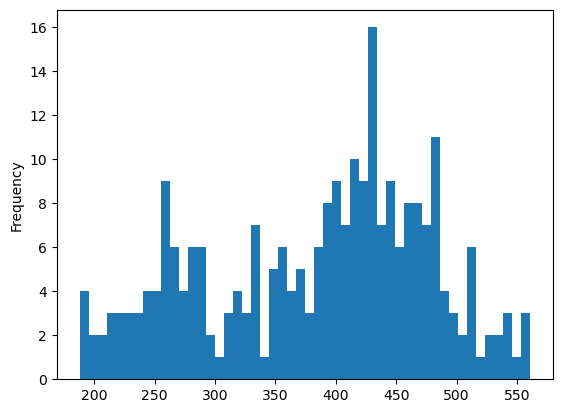

In [1745]:
df_agg["estupro"].plot(kind="hist", bins=50)

In [1746]:
df_agg["estupro"].loc[df_agg["estupro"] < 200]

mes_ano
2003-05-01    189
2003-06-01    198
2003-07-01    188
2004-02-01    199
2004-05-01    195
2004-07-01    195
Name: estupro, dtype: int64

## Criação do Modelo

In [1747]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [1748]:
tss = TimeSeriesSplit(n_splits=5)
df_agg = df_agg.sort_index()
model_data = df_agg.filter(['estupro'])

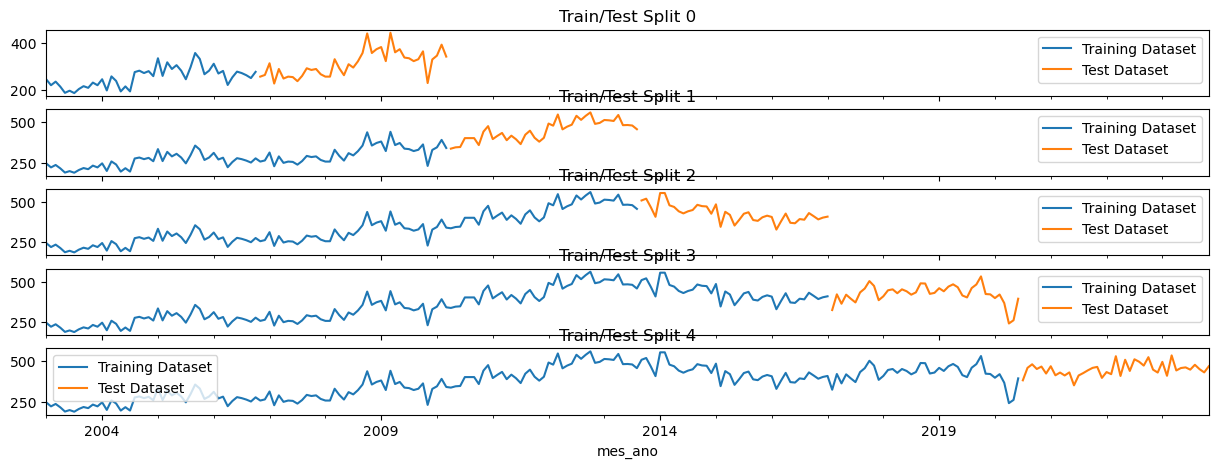

In [1749]:
fig, axs = plt.subplots(5, 1, figsize=(15,5),sharex=True)
fold = 0
for train_idx, val_idx in tss.split(model_data):
    train = model_data.iloc[train_idx]
    test = model_data.iloc[val_idx]
    train.plot(ax=axs[fold], label="Training Dataset", title=f"Train/Test Split {fold}")
    test.plot(ax=axs[fold], label="Test Dataset")
    axs[fold].legend(["Training Dataset", "Test Dataset"])
    fold +=1

In [1750]:
model_data

,estupro
mes_ano,
2003-01-01,245
2003-02-01,221
2003-03-01,236
2003-04-01,215
2003-05-01,189
...,...
2023-07-01,448
2023-08-01,478
2023-09-01,451


In [1751]:
def create_lag_features(data, num_lags, column_name):
    for i in range(1, num_lags+1):
        data[column_name] = data["estupro"].shift(num_lags)
    return data

In [1752]:
df_agg = df_agg.sort_index()
model_data = df_agg.filter(['estupro'])
model_data = create_features(model_data)
model_data = create_lag_features(model_data, 12, "lag1")
model_data.dropna(inplace=True)

In [1753]:
model_data

,estupro,mes,ano,lag1
mes_ano,,,,
2004-01-01,246,1,2004,245.0
2004-02-01,199,2,2004,221.0
2004-03-01,258,3,2004,236.0
2004-04-01,239,4,2004,215.0
2004-05-01,195,5,2004,189.0
...,...,...,...,...
2023-07-01,448,7,2023,512.0
2023-08-01,478,8,2023,497.0
2023-09-01,451,9,2023,473.0


In [1754]:
tss = TimeSeriesSplit(n_splits=5)

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(model_data):
    train = model_data.iloc[train_idx]
    test = model_data.iloc[val_idx]

    FEATURES = ['mes', 'ano', 'lag1']
    TARGET = 'estupro'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.6, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
    
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:266.56923	validation_1-rmse:339.41947
[100]	validation_0-rmse:104.36076	validation_1-rmse:176.49729
[200]	validation_0-rmse:46.43173	validation_1-rmse:119.96985
[300]	validation_0-rmse:25.11573	validation_1-rmse:101.26642
[400]	validation_0-rmse:16.79620	validation_1-rmse:94.14698
[500]	validation_0-rmse:12.77520	validation_1-rmse:92.73630
[600]	validation_0-rmse:10.55237	validation_1-rmse:92.19835
[700]	validation_0-rmse:9.08693	validation_1-rmse:91.94726
[800]	validation_0-rmse:8.04825	validation_1-rmse:91.87532
[900]	validation_0-rmse:7.23028	validation_1-rmse:91.88365
[903]	validation_0-rmse:7.20574	validation_1-rmse:91.88000
[0]	validation_0-rmse:302.62882	validation_1-rmse:471.47340
[100]	validation_0-rmse:119.37748	validation_1-rmse:259.57259
[200]	validation_0-rmse:54.64231	validation_1-rmse:183.77433
[300]	validation_0-rmse:31.86071	validation_1-rmse:154.85993
[400]	validation_0-rmse:23.89787	validation_1-rmse:144.27589
[500]	validation_0-rmse:20.38666	va

In [1755]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores {scores}')

Score across folds 82.4444
Fold scores [91.80220976129303, 136.9300422785494, 40.94246964423439, 62.57945945103151, 79.96768096056266]


In [1756]:
FEATURES = ['mes', 'ano', 'lag1']
TARGET = 'estupro'

X_train = model_data[FEATURES]
y_train = model_data[TARGET]


reg = xgb.XGBRegressor(base_score=0.6, booster='gbtree',
                    n_estimators=600,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=100)

[0]	validation_0-rmse:397.41774
[100]	validation_0-rmse:153.48628
[200]	validation_0-rmse:68.18784
[300]	validation_0-rmse:42.09353
[400]	validation_0-rmse:34.53105
[500]	validation_0-rmse:31.62628
[599]	validation_0-rmse:29.73538


XGBRegressor(base_score=0.6, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1757]:
model_data.index.max()

Timestamp('2023-11-01 00:00:00')

In [1758]:
future = {"mes": [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], "ano": [2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024] }
future_df = pd.DataFrame(future)
future_df['mes_ano'] = future_df['ano'].astype(str) + '-' + future_df['mes'].astype(str).str.zfill(2)
future_df["mes_ano"] = pd.to_datetime(future_df["mes_ano"])
future_df.set_index("mes_ano", inplace=True)
model_data = df_agg.filter(['estupro'])
future_df["isFuture"] = True
model_data["isFuture"] = False
model_data_and_future = pd.concat([model_data, future_df])


In [1759]:
model_data_and_future

,estupro,isFuture,mes,ano
mes_ano,,,,
2003-01-01,245.0,False,NaN,NaN
2003-02-01,221.0,False,NaN,NaN
2003-03-01,236.0,False,NaN,NaN
2003-04-01,215.0,False,NaN,NaN
2003-05-01,189.0,False,NaN,NaN
...,...,...,...,...
2024-07-01,NaN,True,7.0,2024.0
2024-08-01,NaN,True,8.0,2024.0
2024-09-01,NaN,True,9.0,2024.0


In [1760]:
model_data_and_future = create_features(model_data_and_future)
model_data_and_future = create_lag_features(model_data_and_future, 12, "lag1")

In [1761]:
future_with_features = model_data_and_future.query('isFuture').copy()
future_with_features

,estupro,isFuture,mes,ano,lag1
mes_ano,,,,,
2023-12-01,NaN,True,12,2023,430.0
2024-01-01,NaN,True,1,2024,496.0
2024-02-01,NaN,True,2,2024,410.0
2024-03-01,NaN,True,3,2024,536.0
2024-04-01,NaN,True,4,2024,443.0
2024-05-01,NaN,True,5,2024,458.0
2024-06-01,NaN,True,6,2024,462.0
2024-07-01,NaN,True,7,2024,448.0
2024-08-01,NaN,True,8,2024,478.0


In [1762]:
future_with_features["estupro"] = reg.predict(future_with_features[FEATURES])

<Axes: title={'center': 'Previsão Taxa de Estupros 2024'}, xlabel='mes_ano'>

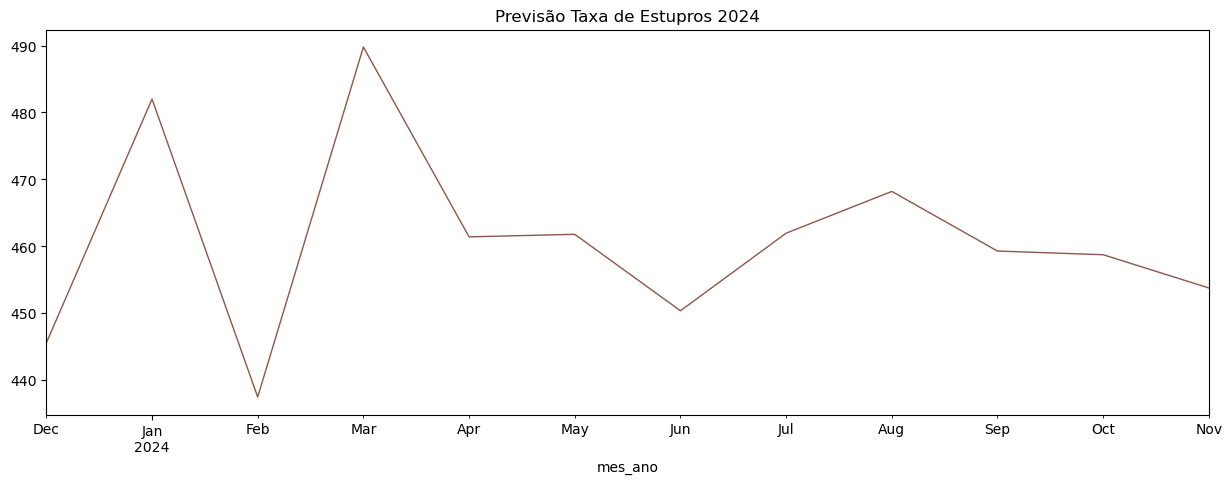

In [1763]:
future_with_features["estupro"].plot(figsize=(15,5), color=color_palette[5], ms=1, lw=1, title="Previsão Taxa de Estupros 2024")

In [1764]:
future_with_features

,estupro,isFuture,mes,ano,lag1
mes_ano,,,,,
2023-12-01,445.546783,True,12,2023,430.0
2024-01-01,482.005005,True,1,2024,496.0
2024-02-01,437.456177,True,2,2024,410.0
2024-03-01,489.781799,True,3,2024,536.0
2024-04-01,461.399811,True,4,2024,443.0
2024-05-01,461.782898,True,5,2024,458.0
2024-06-01,450.351196,True,6,2024,462.0
2024-07-01,461.949341,True,7,2024,448.0
2024-08-01,468.196045,True,8,2024,478.0
